In [9]:
from matplotlib import pyplot as plt
import numpy as np
import requests
import re

In [10]:
# Firstly,I made a spider to catch numbers of articles corresponding to terms that I need. 
# from website get the all numbers of relative articles
# https://pubmed.ncbi.nlm.nih.gov/?term=image&filter=years.2015-2021

def get_data(keyword, year_begin, year_end):
    """
    according to the keywords and years to find articles
    :param keyword: term of articles
    :param year_begin: the begin year for search
    :param year_end: the end year for search 
    :return: the total numbers of articles 
    """
    try:
        year = "years."+str(year_begin)+"-"+str(year_end)
        url = "https://pubmed.ncbi.nlm.nih.gov/" + "?term=" + keyword + "&filter=" + year
        html = requests.get(url).text
        data_str = '<span class="value">(.*?)</span>'
        data = re.compile(data_str, re.S).findall(html)[0].replace(',', '')
        return int(data)
    except Exception:
        return 0

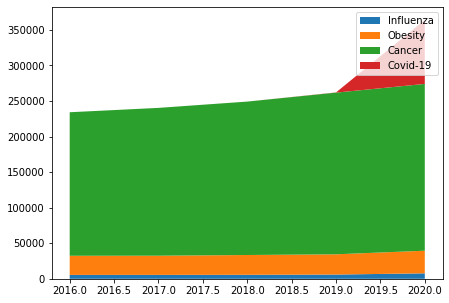

In [11]:
#Use the matplotlib package to plot the area chart

terms = ["Influenza", "Obesity", "Cancer", "Covid-19"] #all terms
years = [2016+i for i in range(5)]
ys = []
#get all data for all terms
for term in terms:
    yi=[]
    for year in years:
        yi.append(get_data(term, year, year))
    ys.append(yi)
#plot the figure
fig, ax = plt.subplots(figsize=(7, 5))
ax.stackplot(years, ys[0], ys[1], ys[2], ys[3])
plt.legend(terms)
plt.show()

In [12]:
#The frequencies of Influenza and obesity are both under 50,000, and increase very flatly from 2016 to 2020.
#The feequencies of cancer covers most area from 2016 to 2020.
#The freqyencies of Covid_19 increases rapidly from 2019 to 2020.

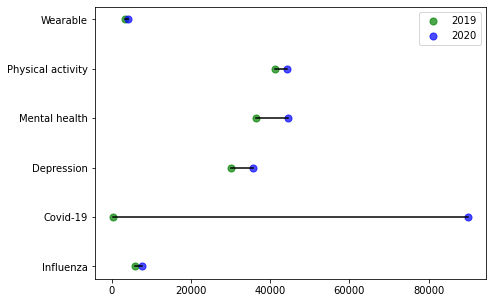

In [24]:
import matplotlib.lines as mlines

terms = ["Influenza", "Covid-19", "Depression", "Mental health", "Physical activity", "Wearable"]
years = [2019, 2020]
ys = []
for term in terms:
    yi=[]
    for year in years:
        yi.append(get_data(term, year, year)) #get numbers of terms
    ys.append(yi)
# ys = [[2,3],[3,4],[4,5],[4,5],[5,6],[5,6]]
ys = np.array(ys)
fig, ax = plt.subplots(figsize=(7, 5))
#plot scatters of points
ax.scatter(y=terms, x=ys[:,0], s=50, color='green', alpha=0.7)
ax.scatter(y=terms, x=ys[:,1], s=50, color='blue', alpha=0.7)
plt.legend(["2019","2020"])
#plot lines among points
for i, p1, p2 in zip(terms, ys[:,0], ys[:,1]):
    ax = plt.gca()
    l = mlines.Line2D([p1, p2], [i, i], color='black')
    ax.add_line(l)
plt.show()

In [22]:
#The keyword Covid-19 appears frequently in 2019 and 2020.
#The frequencies of Inluenza and Wearable are under 20,000 from 2019 to 2020.

In [20]:
#download the data 
#search all country’s lon and lat in the .csv file and MA’s lon and lat. 
#import the package named plotly and get a access token from website ‘https://account.mapbox.com/’. 
#use the API in the plotly to form the target map in a html.

import plotly as py
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pyplt = py.offline.plot
#get the data from the self-made .csv by pdf
country=pd.read_csv('3data.csv')
country.head()
##plot the map by the data from csv
fig=px.scatter_mapbox(country,   lon='lon',
                                 lat='lat',
                                 size='numbers',
                                 color='numbers',
                                 hover_name='country',
                                 hover_data=['country'],
                                 size_max=30,
                                 color_continuous_scale=px.colors.cyclical.HSV
                                 )

token='pk.eyJ1Ijoic3l2aW5jZSIsImEiOiJjazZrNTcwY3kwMHBrM2txaGJqZWEzNWExIn0.tLQHY_OoiR2NMxnYHXUBAA'
fig.update_layout(mapbox={'accesstoken':token,'center':{'lon':-71.8083,'lat':42.2596}},
                 title={'text':'confirmed cases'},)
#get the map of html
pyplt(fig, filename='confirmed cases.html')

'confirmed cases.html'

In [16]:
#Middlesex has the most infection cases
